In [21]:
import requests
import pandas as pd
import numpy as np
import panel as pn
pn.extension("tabulator")

import hvplot.pandas

In [22]:
# Uncomment it to load the current data of COVID19

# response=requests.get("https://covid.ourworldindata.org/data/owid-covid-data.xlsx")

# if response.status_code == 200:
#     with open("owid-covid-data.xlsx", 'wb') as file:
#         file.write(response.content)
#     print(f"File downloaded successfully")
# else:
#     print(f"Failed to download file")

In [23]:
df=pd.read_excel("owid-covid-data.xlsx")
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [24]:
df=df.fillna(0)
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [25]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0


In [26]:
df["date"]=pd.to_datetime(df["date"])
df["Year"]=df["date"].dt.year
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,Year
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0,2020
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0,2020
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0,2020
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0,2020
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,37.746,0.5,64.83,0.511,41128772,0.0,0.0,0.0,0.0,2020


In [27]:
idf = df.interactive()

In [28]:
year_slider=pn.widgets.IntSlider(name="Year slider",start=min(df["Year"]),end=max(df["Year"]))
year_slider

BokehModel(combine_events=True, render_bundle={'docs_json': {'f2e918f3-c2f0-44d1-8997-c376824a143b': {'version…

In [29]:
yaxis_col=pn.widgets.RadioButtonGroup(
    name="Y axis",
    options=["total_cases","total_deaths"],
    button_type="success"
)

In [30]:
continents=list(df["continent"].unique())
continents.remove(0)
deaths_pipeline=(
idf[
    (idf.Year<=year_slider) &
    (idf.continent.isin(continents))
]
.groupby(["continent","Year"])[yaxis_col].mean()
.to_frame()
.reset_index()
.sort_values(by="Year")
.reset_index(drop=True)
)

In [31]:
deaths_plot=deaths_pipeline.hvplot(x="Year",by="continent",y=yaxis_col,line_width=2,title="Covid Deaths By Continent")
deaths_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'ec3d319d-ecdf-46b3-8105-07efffd1ebfc': {'version…

In [32]:
death_table = deaths_pipeline.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
death_table

BokehModel(combine_events=True, render_bundle={'docs_json': {'8d54ec8c-68ed-4e4a-99c2-9e168a157fd3': {'version…

In [33]:
serious_patients_vs_deaths=(
    idf[
        (idf.Year==year_slider)&
        (idf.continent.isin(continents))
    ]
    .groupby(["location","Year"])["new_cases"].mean()
    .to_frame()
    .reset_index()
    .sort_values(by="Year")
    .reset_index(drop=True)
)

In [34]:
location_scatterplot=serious_patients_vs_deaths.hvplot(x="Year",y="new_cases", by='location',  size=80, kind="scatter",
 alpha=0.7, legend=False,  height=500, width=500,title="New Cases By Location")
location_scatterplot

BokehModel(combine_events=True, render_bundle={'docs_json': {'8716c403-d8fd-46f4-879c-81f410590866': {'version…

In [35]:
yaxis_cases_source = pn.widgets.RadioButtonGroup(
    name='Y axis', 
    options=["people_vaccinated","people_fully_vaccinated","total_vaccinations"], 
    button_type='success'
)


cases_source_bar_pipeline = (
    idf[
        (idf.Year == year_slider) &
        (idf.continent.isin(continents))
    ]
    .groupby(['Year', 'continent'])[yaxis_cases_source].sum()
    .to_frame()
    .reset_index()
    .sort_values(by='Year')  
    .reset_index(drop=True)
)

In [36]:
cases_source_bar_plot = cases_source_bar_pipeline.hvplot(kind='bar', 
                                                     x='continent', 
                                                     y=yaxis_cases_source, 
                                                     title='Vaccinations By Continent')
cases_source_bar_plot

BokehModel(combine_events=True, render_bundle={'docs_json': {'a12f9f8b-53bf-479b-91d7-640e20c5f46e': {'version…

FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo()
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [main-1785308076304] Row
        [0] Column(margin=(0, 25))
            [0] RadioButtonGroup(button_type='success', name='Y axis', options=['total_cases', ...], value='total_cases')
            [1] ParamFunction(function, _pane=HoloViews, defer_load=False, width=700)
        [1] ParamFunction(function, _pane=Tabulator, defer_load=False, width=500)
    [main-1785307918672] Row
        [0] Column(margin=(0, 25))
            [0] ParamFunction(function, _pane=HoloViews, defer_load=False, width=600)
        [1] Column
            [0] RadioButtonGroup(button_type='success', name='Y axis', options=['people_vaccinated', ...], value='people_vaccinated')
            [1] ParamFunction(function, _pane=HoloViews, defer_load=False, width=600)
    [nav-1785288198224] Markdown(str)
    [nav-1785308300304] Markdown(str)
    [nav-1785308300112] PNG(str, sizing_mode='scale_both')
    [nav-1785308303568] Markdown(str)
    [nav-1786610216272] IntSlider(end=2024, name='Year slider', start=2020, value=2020)
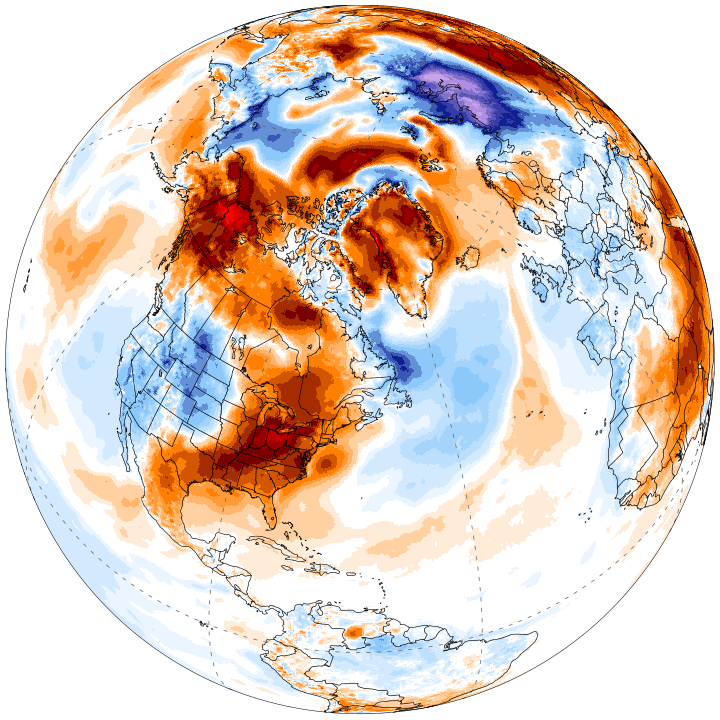

In [43]:
template = pn.template.FastListTemplate(
    title='World Covid Data Analysis Dashboard', 
    sidebar=[pn.pane.Markdown("# Covid around the world"), 
             pn.pane.Markdown("#### The impact of COVID-19 around the world has been particularly severe for older adults and children, resulting in a higher mortality rate among these vulnerable populations. The pandemic has placed immense strain on global healthcare systems, resulting in heightened demand for medical resources and stretched healthcare infrastructure to its limits. Additionally, socially, the pandemic has precipitated widespread behavioral changes, including the widespread adoption of remote work and virtual learning, as well as heightened awareness of hygiene practices and public health measures."), 
             pn.pane.PNG('covid_day.png', sizing_mode='scale_both'),
             pn.pane.Markdown("## Settings"),   
             year_slider],
    main=[pn.Row(pn.Column(yaxis_col, 
                           deaths_plot.panel(width=700), margin=(0,25)), 
                 death_table.panel(width=500)), 
          pn.Row(pn.Column(location_scatterplot.panel(width=600), margin=(0,25)), 
                 pn.Column(yaxis_cases_source, cases_source_bar_plot.panel(width=600)))],
    accent_base_color="#88d8b0",
    header_background="#88d8b0",
)
# template.show()
template.servable()